In [26]:
#Import the dependencies
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
data_df= pd.read_csv("covid_complete.csv")
data_df.head()

,Unnamed: 0,fips,state,county,number_of_deaths,latitude,longitude,total_population,area_per_square_mile,population_density_per_square_mile,...,mobile_homes,overcrowding_rank,no_vehicle_household,institutionalized_ranker,housing_and_transportation,social_vulnerability,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19"
0,0,1001,Alabama,Autauga,791.0,32.534928,-86.642748,55049.0,594.446120,92.605533,...,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773,4291.0,12551.0,10596.0,9929.0
1,1,1003,Alabama,Baldwin,2967.0,30.727489,-87.722575,199510.0,1589.807425,125.493187,...,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757,13893.0,41797.0,47274.0,48148.0
2,2,1005,Alabama,Barbour,472.0,31.869589,-85.393213,26614.0,884.875776,30.076538,...,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847,4812.0,6396.0,4676.0,2080.0
3,3,1007,Alabama,Bibb,471.0,32.998634,-87.126480,22572.0,622.582355,36.255444,...,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737,3386.0,7256.0,3848.0,1678.0
4,4,1009,Alabama,Blount,1085.0,33.980878,-86.567383,57704.0,644.806508,89.490412,...,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986,7763.0,13299.0,13519.0,5210.0


In [28]:
data_df.drop(['Unnamed: 0','fips','state','county','latitude','longitude'],axis='columns', inplace=True)

In [29]:
data_df.head()

,number_of_deaths,total_population,area_per_square_mile,population_density_per_square_mile,minority_percentage,limited_english,multi_unit_housing,mobile_homes,overcrowding_rank,no_vehicle_household,institutionalized_ranker,housing_and_transportation,social_vulnerability,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19"
0,791.0,55049.0,594.446120,92.605533,0.6339,0.5355,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773,4291.0,12551.0,10596.0,9929.0
1,2967.0,199510.0,1589.807425,125.493187,0.5253,0.5282,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757,13893.0,41797.0,47274.0,48148.0
2,472.0,26614.0,884.875776,30.076538,0.9042,0.6979,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847,4812.0,6396.0,4676.0,2080.0
3,471.0,22572.0,622.582355,36.255444,0.6450,0.3553,0.4072,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737,3386.0,7256.0,3848.0,1678.0
4,1085.0,57704.0,644.806508,89.490412,0.4238,0.7482,0.1344,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986,7763.0,13299.0,13519.0,5210.0


In [30]:
data_df.dtypes

number_of_deaths                               float64
total_population                               float64
area_per_square_mile                           float64
population_density_per_square_mile             float64
minority_percentage                            float64
limited_english                                float64
multi_unit_housing                             float64
mobile_homes                                   float64
overcrowding_rank                              float64
no_vehicle_household                           float64
institutionalized_ranker                       float64
housing_and_transportation                     float64
social_vulnerability                           float64
Less than a high school diploma, 2015-19       float64
High school diploma only, 2015-19              float64
Some college or associate's degree, 2015-19    float64
Bachelor's degree or higher, 2015-19           float64
dtype: object

In [31]:
data_df.corr()['number_of_deaths']

number_of_deaths                               1.000000
total_population                               0.973784
area_per_square_mile                           0.025095
population_density_per_square_mile             0.311260
minority_percentage                            0.241787
limited_english                                0.276481
multi_unit_housing                             0.363160
mobile_homes                                  -0.271149
overcrowding_rank                              0.134660
no_vehicle_household                           0.155547
institutionalized_ranker                      -0.017983
housing_and_transportation                     0.162899
social_vulnerability                           0.072261
Less than a high school diploma, 2015-19       0.906951
High school diploma only, 2015-19              0.986901
Some college or associate's degree, 2015-19    0.977690
Bachelor's degree or higher, 2015-19           0.922002
Name: number_of_deaths, dtype: float64

In [32]:
#drop columns with little correaltion
data_df.drop(['area_per_square_mile','mobile_homes','institutionalized_ranker','social_vulnerability'],axis='columns', inplace=True)

In [33]:
data_df.head()

,number_of_deaths,total_population,population_density_per_square_mile,minority_percentage,limited_english,multi_unit_housing,overcrowding_rank,no_vehicle_household,housing_and_transportation,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19"
0,791.0,55049.0,92.605533,0.6339,0.5355,0.6791,0.2477,0.3298,0.2881,4291.0,12551.0,10596.0,9929.0
1,2967.0,199510.0,125.493187,0.5253,0.5282,0.9733,0.2639,0.0872,0.3324,13893.0,41797.0,47274.0,48148.0
2,472.0,26614.0,30.076538,0.9042,0.6979,0.2814,0.4438,0.8816,0.9312,4812.0,6396.0,4676.0,2080.0
3,471.0,22572.0,36.255444,0.6450,0.3553,0.4072,0.0248,0.5645,0.6663,3386.0,7256.0,3848.0,1678.0
4,1085.0,57704.0,89.490412,0.4238,0.7482,0.1344,0.5056,0.1907,0.1827,7763.0,13299.0,13519.0,5210.0


In [34]:
data_df.shape

(3142, 13)

In [35]:
data_df.columns

Index(['number_of_deaths', 'total_population',
       'population_density_per_square_mile', 'minority_percentage',
       'limited_english', 'multi_unit_housing', 'overcrowding_rank',
       'no_vehicle_household', 'housing_and_transportation',
       'Less than a high school diploma, 2015-19',
       'High school diploma only, 2015-19',
       'Some college or associate's degree, 2015-19',
       'Bachelor's degree or higher, 2015-19'],
      dtype='object')

In [36]:
#Find null values
for column in data_df.columns:
    print(f"Column {column} has {data_df[column].isnull().sum()} null values")

Column number_of_deaths has 0 null values
Column total_population has 0 null values
Column population_density_per_square_mile has 0 null values
Column minority_percentage has 0 null values
Column limited_english has 0 null values
Column multi_unit_housing has 0 null values
Column overcrowding_rank has 0 null values
Column no_vehicle_household has 0 null values
Column housing_and_transportation has 0 null values
Column Less than a high school diploma, 2015-19 has 0 null values
Column High school diploma only, 2015-19 has 0 null values
Column Some college or associate's degree, 2015-19 has 0 null values
Column Bachelor's degree or higher, 2015-19 has 0 null values


In [37]:
# Create our features 
X = data_df.drop(columns=['number_of_deaths'], axis=1)
# Create our target
y = data_df["number_of_deaths"]

In [38]:
# Scale the data
Scaler = StandardScaler().fit(X)
X = Scaler.transform(X)

In [40]:

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 0) 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()   
regressor.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.9731904050032136


In [45]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.9823416444527159
Test Score:  0.9731904050032136


<AxesSubplot:>

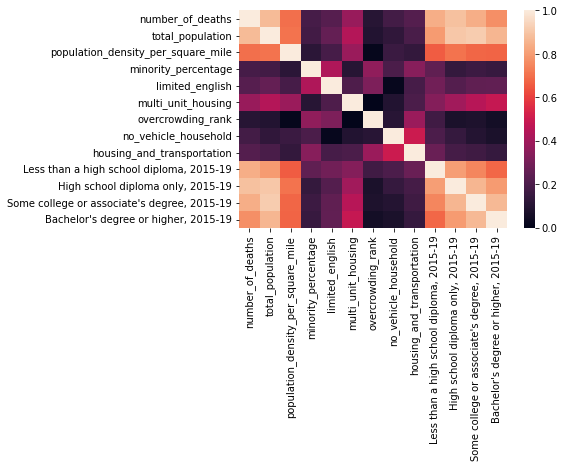

In [47]:
# Plot the overall confusion matrix
import seaborn as sn
corrMatrix = data_df.corr(method="kendall")
sn.heatmap(corrMatrix)